# Imports

In [1]:
# Imports 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Read in the data

In [2]:
# Read in file
f = Path("Resources/crypto_data.csv")
df = pd.read_csv(f)
# Cheack head contents
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


# Cleaning Process

In [3]:
# Rename all unnamed columns in dataframe
df.columns
df.columns = ['CoinAbbr', 'CoinName', 'Algorithm', 'IsTrading', 'ProofType',
       'TotalCoinsMined', 'TotalCoinSupply']
# Make sure columns did get rennamed properly
df.head()

,CoinAbbr,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Check shape of data frame
df.dtypes

CoinAbbr            object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [5]:
# Discard all currencies that are not trading
trading_df = df[(df['IsTrading']==True)]
# Drop column from dataframe
trading_df = trading_df.drop(['IsTrading'], axis=1)

In [6]:
# Remove null values from dataframe
trading_df.dropna()

,CoinAbbr,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Filter for the coins that have been mined
mined_df = trading_df.loc[trading_df['TotalCoinsMined'] > 0]
# Check shape of dataframe again before dropping anything
mined_df.shape

(532, 6)

In [8]:
# Delete both coinname and coinabbr from dataframe
mined_df = mined_df.drop(['CoinName', 'CoinAbbr'], axis=1)

In [9]:
# Convert columns to numerical data for ml
cleaned_df = pd.get_dummies(mined_df, columns=['Algorithm', 'ProofType'], drop_first=True)

In [10]:
# Look at the head of new cleaned dataframe
cleaned_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Start Unsupervised Learning Process

In [11]:
# Scale model
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df)

In [12]:
# PCA model
pca = PCA(n_components=0.90)

pca_crypto = pca.fit_transform(scaled_data)

In [13]:
# Make a dataframe from PCA model
pca_df = pd.DataFrame(data=pca_crypto)
# Look at dataframe head
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,2.601561e-14,6.522550e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,4.771880e-16,-3.658501e-15,-4.195183e-16,1.310193e-15,-1.959094e-15,1.556045e-15,2.226507e-15,5.911445e-16,-3.078212e-15,3.872931e-16
1,-0.319249,1.043547,-0.537804,0.001337,2.629941e-14,6.540291e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,8.020778e-16,-3.375755e-15,1.088861e-16,1.133463e-15,-1.820442e-15,1.301803e-15,1.699764e-15,4.381857e-16,-3.092618e-15,5.001934e-16
2,2.304716,1.669996,-0.624077,0.004420,3.966537e-14,9.596858e-14,-0.062312,-1.554093,-0.945690,0.375087,...,6.821266e-15,2.501708e-14,-1.564621e-14,-6.775102e-15,-6.239732e-14,1.767195e-14,3.937774e-15,9.510967e-15,-8.014290e-15,-1.749375e-14
3,-0.145455,-1.323925,0.177429,-0.001167,-9.302608e-15,-2.509897e-14,0.000326,0.283548,0.252906,-0.079820,...,-7.503107e-15,1.140211e-14,5.528911e-16,-1.190721e-14,-5.476968e-15,5.672859e-15,-6.422268e-16,1.869553e-15,-9.226112e-16,-6.705759e-15
4,-0.151951,-2.044976,0.364208,-0.001636,-2.157542e-14,-4.687778e-14,0.032350,0.524429,0.191031,0.074021,...,-2.028875e-13,1.068663e-13,3.192552e-14,-7.471559e-14,-8.782977e-14,-1.492744e-15,3.060897e-14,4.285098e-14,9.924138e-14,1.037389e-13


In [14]:
# Run t-SNE on principal components
tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(pca_df)

C:\Users\cheye\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


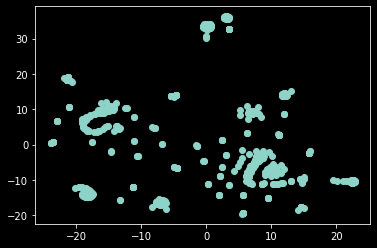

In [15]:
# Plot scatter plot based on t-sne data
plt.scatter(tsne_features[:,0], tsne_features[:,1])
# Show scatter plot
plt.show()

In [16]:
# Find inertia 
inertia = []

k = list(range(1,10))

# Find the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create elbow dataframe for plotting 
elbow = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow)
# View data head
df_elbow.head()

C:\Users\cheye\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,196858.281250
1,2,107363.492188
2,3,63566.812500
3,4,39105.761719
4,5,24455.951172


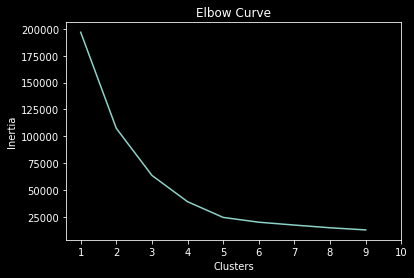

In [17]:
# Plot the curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()